In [ ]:
import os

# Import installed libraries
import ipywidgets
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
try:
    from google.colab import drive
    drive.mount('/gdrive')
    core_path = "/path name/"
except ModuleNotFoundError:
    core_path = ""

Mounted at /gdrive


In [ ]:
asteroids_df = pd.read_pickle(os.path.join(core_path, "data/lvl2/", "asteroids.pkl"))

In [ ]:
asteroids_df["SpectrumDF"].iloc[0]

,Wavelength_in_microm,Reflectance_norm550nm
0,0.44,0.9281
1,0.45,0.9388
2,0.46,0.9488
3,0.47,0.9572
4,0.48,0.9643
5,0.49,0.9716
6,0.50,0.9788
7,0.51,0.9859
8,0.52,0.9923
9,0.53,0.9955


<function matplotlib.pyplot.show(close=None, block=None)>

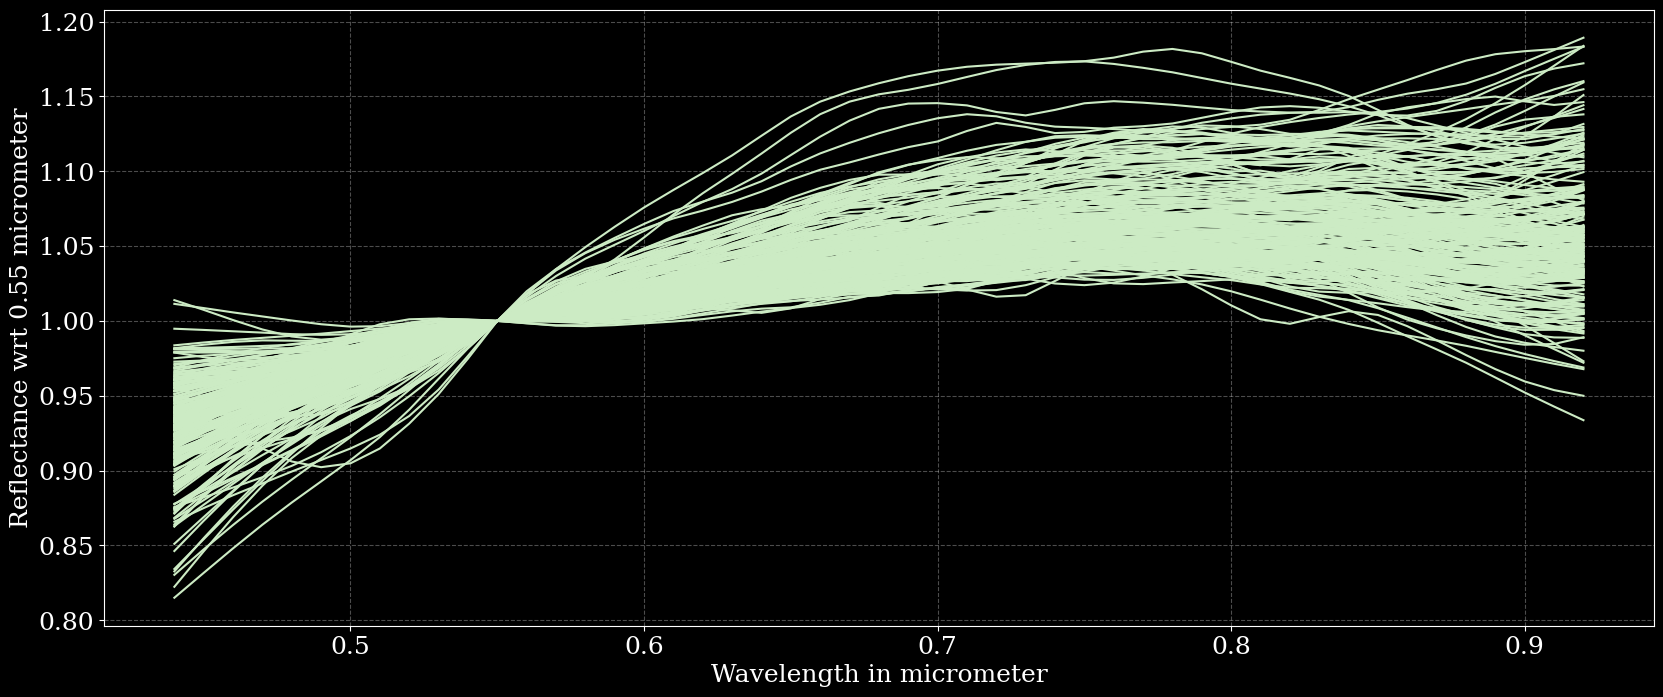

In [ ]:
plt.style.use("dark_background")
plt.rc("font", family="serif", size=18)

plt.figure(figsize=(20,8))

asteroids_filtered_df = asteroids_df.loc[asteroids_df["Main_Group"] == "X"]

for _, row in asteroids_filtered_df.iterrows():

    plt.plot(row["SpectrumDF"]["Wavelength_in_microm"],
             row["SpectrumDF"]["Reflectance_norm550nm"],
          color="#ccebc4")

plt.xlabel("Wavelength in micrometer")
plt.ylabel("Reflectance wrt 0.55 micrometer")

plt.grid(linestyle="dashed", alpha=0.3)

plt.show

In [ ]:
top_class_widget = ipywidgets.Dropdown(options = ['Bus_Class', 'Main_Group'])
sub_class_widget = ipywidgets.Dropdown()

# Define a function that updates the content of the sub class based on the top class selection
def update_sub_class(*args):
    sub_class_widget.options = sorted(asteroids_df[top_class_widget.value].unique())
top_class_widget.observe(update_sub_class)

# Set the dark mode and the font size and style
plt.style.use('dark_background')
plt.rc('font', family='serif', size=18)

# Set a function for the (interactive) plots
def plot_single_spec(top_class, sub_class, ylim_fixed=False):

    # Create a "wide screen figure"
    plt.figure(figsize=(20,8))

    # Get the number of available spectra. This value is later used to adjust the alpha value ...
    nr_of_spec = float(len(asteroids_df[top_class]==sub_class))

    print(f"Number of ({top_class}) {sub_class} spectra: {nr_of_spec}")

    # ... however we do not want to exaggerate it with the transperancy!
    if nr_of_spec > 10:
        nr_of_spec = 10

    asteroids_filtered_df = asteroids_df.loc[asteroids_df[top_class]==sub_class]

    # Iterate trough the spectra and plot them
    for _, row in asteroids_filtered_df.iterrows():

        plt.plot(row["SpectrumDF"]["Wavelength_in_microm"],
                 row["SpectrumDF"]["Reflectance_norm550nm"],
                 alpha=1.0/nr_of_spec,
                 color='#ccebc4')

    # Set labels
    plt.xlabel("Wavelength in micrometer")
    plt.ylabel("Reflectance w.r.t. 0.55 micrometer")

    # Set a fixed y limit range if requested
    if ylim_fixed:
        plt.ylim(0.5, 1.5)

    # Properties
    plt.xlim(min(row["SpectrumDF"]["Wavelength_in_microm"]),
             max(row["SpectrumDF"]["Wavelength_in_microm"]))
    plt.grid(linestyle="dashed", alpha=0.3)

    plt.show()

# Create an interactive session!
ipywidgets.interactive(plot_single_spec,
                       top_class=top_class_widget,
                       sub_class=sub_class_widget,
                       ylim_fixed=False)

interactive(children=(Dropdown(description='top_class', options=('Bus_Class', 'Main_Group'), value='Bus_Class'…

In [ ]:
asteroids_df[["Bus_Class", "Main_Group"]].describe()

,Bus_Class,Main_Group
count,1331,1331
unique,25,4
top,S,S
freq,381,543


In [ ]:
asteroids_df.groupby(["Main_Group", "Bus_Class"])["Bus_Class"].agg(["count"])

count
Main_Group Bus_Class       
C          B             60
           C            141
           Cb            33
           Cg             9
           Cgh           15
           Ch           137
Other      A             16
           D              9
           K             31
           L             34
           Ld            12
           O              1
           R              4
           T             14
           V             35
S          S            381
           Sa            34
           Sk            16
           Sl            49
           Sq            49
           Sr            14
X          X            110
           Xc            60
           Xe            28
           Xk            39

In [ ]:
asteroids_df.groupby(['Main_Group'])["Main_Group"].agg(['count'])

,count
Main_Group,
C,395
Other,156
S,543
X,237
